# 6 Phase Plane
---

*Overview*

- [6.0 Introduction](#6.0-Introduction)
- [6.1 Phase Portraits](#6.1-Phase-Portraits)
     - [Numerical Computaion of Phase Portraits](#Numerical-Computaion-of-Phase-Portraits)
     - [Example 6.1.1](#Example-6.1.1)
- [6.2 Exsitence, Uniquness, and Topological Consequences](#6.2-Exsitence,-Uniquness,-and-Topological-Consequences)
    - [Existence and Uniquness Theorem](#Existence-and-Uniquness-Theorem)
- [6.3 Fixed Points and Linearization](#6.3-Fixed-Points-and-Linearization)
    - [Linearized System](#Linearized-System)
    - [The Effect of Small Nonlinear Terms](#The-Effect-of-Small-Nonlinear-Terms)
    - [Example 6.3.1](#Example-6.3.1)
    - [Example 6.3.2](#Example-6.3.2)
    - [Robust cases](#Robust-cases)
    - [Hyperbolic Fixed Points, Topological Equivalence, and Structural Stability](#Hyperbolic-Fixed-Points,-Topological-Equivalence,-and-Structural-Stability)
- [6.4 Rabbits versus Sheep](#6.4-Rabbits-versus-Sheep)
- [6.5 Conservative Systems](#6.5-Conservative-Systems)
    - [Example 6.5.1](#Example-6.5.1)
    - [Example 6.5.2](#Example-6.5.2)
    - [Example 6.5.3](#Example-6.5.3)
    - [Nonlinear Centers](#Nonlinear-Centers)

---

In [1]:
# import
import numpy as np
import scipy
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import IPython

import datetime
dt = datetime.datetime.now()

print('%s-%s-%s %s:%s:%s\n----------------------\n' 'numpy\t\t%s\n' 'scipy\t\t%s\n' 'pandas\t\t%s\n' 'matplotlib\t%s\n' '----------------------\n' 'ipython\t\t%s' % 
      (dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second, np.__version__, scipy.__version__, pd.__version__, mpl.__version__, IPython.__version__))

2018-7-3 10:39:14
----------------------
numpy		1.13.3
scipy		0.19.1
pandas		0.22.0
matplotlib	2.1.1
----------------------
ipython		6.1.0


In [2]:
c = ['#1f77b4', 
     '#ff7f0e', 
     '#2ca02c', 
     '#d62728', 
     '#9467bd', 
     '#8c564b', 
     '#e377c2', 
     '#7f7f7f', 
     '#bcbd22', 
     '#17becf']

l = ['-', '--', '-.', ':']
m = ['o', 'x', 's']

In [ ]:
xmin, xmax, ymin, ymax = -1, 1, -1, 1

x, y = np.linspace(xmin, xmax), np.linspace(ymin, ymax)

xlim(xmin, xmax)
ylim(ymin, ymax)

plt.text(, , r'$$', 
         ha='center', va='center', 
         bbox=dict(fc=(1, 1, 1, .7), ec='none'))

figname = ''
plt.savefig(('img/fig_%s.png' % figname), dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='png',
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None)

$$\begin{align*}
& \quad\quad (6..)
\end{align*}$$

---

## 6.0 Introduction
---

## 6.1 Phase Portraits
---

$$
\dot{x}_1 = f_1 (x_1, x_2) \\
\dot{x}_2 = f_2 (x_1, x_2)
$$

$$\mathbf{\dot{x}} = \mathbf{f}( \mathbf{x} )$$

- **fixed points**
- **closed orbits**



### Numerical Computaion of Phase Portraits

Runge-Kutta method


$$\mathbf{x}_{n+1} = \mathbf{x}_n + \frac{1}{6} (\mathbf{k}_1 + 2\mathbf{k}_2 + 2\mathbf{k}_3 + \mathbf{k}_4)$$


$$\begin{align*}
\mathbf{k}_1 &= \mathbf{f}(\mathbf{x}_n)  \Delta t \\
\mathbf{k}_2 &= \mathbf{f}(\mathbf{x}_n + \frac{1}{2}\mathbf{k}_1)  \Delta t \\
\mathbf{k}_3 &= \mathbf{f}(\mathbf{x}_n + \frac{1}{2}\mathbf{k}_2)  \Delta t \\
\mathbf{k}_4 &= \mathbf{f}(\mathbf{x}_n + \mathbf{k}_3)  \Delta t
\end{align*}$$

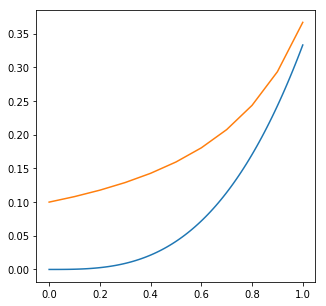

[ 0.1         0.10816369  0.11773072  0.12908734  0.14277264  0.15956098
  0.18060296  0.20767941  0.24368753  0.29364434  0.36696431]


In [9]:
def x_dot(x, y):
    x_ = x + np.exp(-y)
    return x_

def y_dot(x, y):
    y_ = -y
    return y_

def f(x):
    x_ = x**2
    return x_

def F(x):
    y = 1/3 * x**3
    return y

def k_1(xi, dt):
    k = f(xi) * dt
    return k

def k_2(xi, dt):
    k = f(xi + k_1(xi, dt)/2) * dt
    return k

def k_3(xi, dt):
    k = f(xi + k_2(xi, dt)/2) * dt
    return k

def k_4(xi, dt):
    k = f(xi + k_3(xi, dt)) * dt
    return k

def rk(x0, dt, n):
    x = np.array([x0])
    
    for i in range(n):
        xi0 = x[i]
        xi1 = xi0 + (k_1(xi0, dt) + k_2(xi0, dt) + k_3(xi0, dt) + k_4(xi0, dt))
        
        x = np.append(x, np.array([xi1]))
    return x

x = np.linspace(0, 1, 100)

x_rk = rk(.1, .2, 10)

plt.figure(figsize=(5, 5))

# plt.plot(x, f(x))
plt.plot(x, F(x))

plt.plot(np.linspace(0, 1, 11), x_rk)

plt.show()

print(x_rk)

In [ ]:
# x_ 
# y_ 

A = np.array([-1, 0, 0, -1]).reshape((2, 2))

def X_dot(X):
    X_ = np.multiply(A, X)
    return X_



### Example 6.1.1

Consider the system 
$$\begin{align*}
\dot{x} &= x+ e^{-y}\\
\dot{y} &= -y
\end{align*}$$

*Solution*:

$\dot{x} = 0, \dot{y} = 0$

$(x^*, y^*)=(-1, 0)$

to determine stability

$y(t) \rightarrow 0$, as $t \rightarrow \infty$ &because; $y(t) = y_0 e^{-t}$

$e^{-y} \rightarrow 1$, $\dot{x} \approx x + 1$

**nullclines**
- $\dot{x} = 0$ / $\dot{y} = 0$

where $\dot{y} = 0$, 
$y = 0$



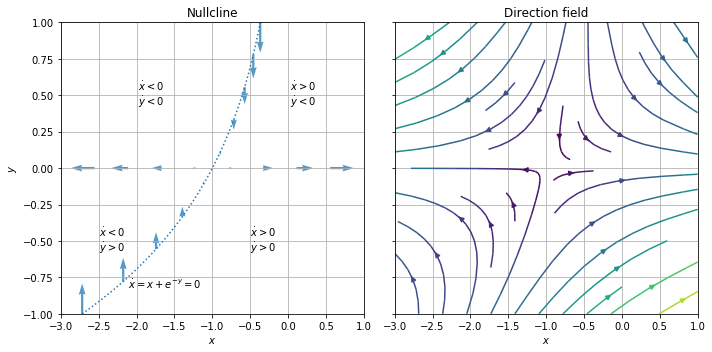

In [3]:
def x_dot(x, y):
    x_ = x + np.exp(-y)
    return x_

def y_dot(x, y):
    y_ = -y
    return y_

def speed(x, y):
    s = x_dot(x, y)**2 + y_dot(x, y)**2
    s = np.sqrt(s)
    return s

def nullcline_y(x, y):
    x_ = x + 1
    return x_

def nullcline_x(y):
    x = - np.exp(-y)
    y_ = -y
    return x, y_

xlim = np.array([-3, 1])
ylim = np.array([-1, 1])

fig, (ax0, ax1) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10, 5))
# plt.figure(figsize=(10, 10))
figname = '6_1_3'


x, y = np.linspace(xlim[0], xlim[1], 10), np.linspace(ylim[0], ylim[1], 10)
x, y = np.meshgrid(x, y)

ax1.streamplot(x, y, x_dot(x, y), y_dot(x, y), density=.5, color=speed(x, y), cmap='viridis')

ax1.set_xlabel(r'$x$')
ax1.grid(True)
ax1.set_title('Direction field')
ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])


# x = np.linspace(xlim[0], xlim[1], 5)
# y = np.linspace(xlim[0], xlim[1], 5)
# x, y = np.meshgrid(x, y)
# ax0.quiver(x, y, x_dot(x, y), y_dot(x, y), color=c[0], alpha=.6)

# y_dot = 0
x = np.linspace(xlim[0], xlim[1], 10)
y = np.repeat(0, 10)
y_dot = np.repeat(0, 10)
x_dot = nullcline_y(x, y)
ax0.quiver(x, y, x_dot, y_dot, color=c[0], alpha=.75)

# x_dot = 0
y = np.linspace(ylim[0], ylim[1], 10)
x, y_dot = nullcline_x(y)
x_dot = np.repeat(0, 10)
ax0.quiver(x, y, x_dot, y_dot, color=c[0], alpha=.75)

y = np.linspace(ylim[0], ylim[1], 100)
x, y_dot = nullcline_x(y)
ax0.plot(x, y, c=c[0], linestyle=l[3])
ax0.text(-np.exp(.75), -.75, r'$\dot{x} = x + e^{-y} = 0$', horizontalalignment='left', verticalalignment='top')

ax0.text((xlim[0]-np.exp(-ylim[0]/2))/2, ylim[0]/2, r'$\dot{x} < 0$' '\n' r'$\dot{y} > 0$', ha='center', va='center')
ax0.text((xlim[1]-np.exp(-ylim[0]/2))/2, ylim[0]/2, r'$\dot{x} > 0$' '\n' r'$\dot{y} > 0$', ha='center', va='center')
ax0.text((xlim[1]-np.exp(-ylim[1]/2))/2, ylim[1]/2, r'$\dot{x} > 0$' '\n' r'$\dot{y} < 0$', ha='center', va='center')
ax0.text((xlim[0]-np.exp(-ylim[1]/2))/2, ylim[1]/2, r'$\dot{x} < 0$' '\n' r'$\dot{y} < 0$', ha='center', va='center')


ax0.set_xlabel(r'$x$')
ax0.set_ylabel(r'$y$')
ax0.grid(True)
ax0.set_title('Nullcline')
ax0.set_xlim(xlim[0], xlim[1])
ax0.set_ylim(ylim[0], ylim[1])


plt.tight_layout()

# plt.savefig(('img/fig_%s.png' % figname), dpi=None, facecolor='w', edgecolor='w',
#             orientation='portrait', papertype=None, format='png',
#             transparent=False, bbox_inches=None, pad_inches=0.1,
#             frameon=None)

plt.show()

## 6.2 Exsitence, Uniquness, and Topological Consequences
---

$\mathbf{\dot{x}} = \mathbf{f}(\mathbf{x})$


### Existence and Uniquness Theorem

$\mathbf{\dot{x}} = \mathbf{f}(\mathbf{x}), \quad \mathbf{x}(0) = \mathbf{x}_0$

$$\begin{align*}
\partial f_1 / \partial x_j, \quad i, j = 1, \cdots, n
\end{align*}$$

**criss-crossed curve**

[**Poincaré–Bendixson theorem**](https://en.wikipedia.org/wiki/Poincaré–Bendixson_theorem)

## 6.3 Fixed Points and Linearization
---

**Linearization** technique


### Linearized System

$$\begin{align*}
\dot{x} &= f(x, y) \\
\dot{y} &= g(x, y)
\end{align*}$$

$(x^*, y^*)$: fixed point


$$\begin{align*}
f(x^*, y^*) = 0, \quad g(x^*, y^*) = 0
\end{align*}$$

Let 
$$\begin{align*}
u := x - x^*, \quad v := y - y^*
\end{align*}$$

denote small disturbance from fixed point

$$\begin{align*}
\dot{u} 
&= \dot{x} &\quad (x^*\text{ is a constant}) \\
&= f(x^* + u, y^*+v) &\quad \text{(by substitution)} \\
&= f(x^*, y^*) + u\frac{\partial f}{\partial x} + v\frac{\partial f}{\partial y} + O(u^2, v^2, uv) &\quad \text{(Taylor series expansion)} \\
&= u\frac{\partial f}{\partial x} + v\frac{\partial f}{\partial y} + O(u^2, v^2, uv) &\quad \text{(}f(x^*, y^*) = 0\text{)}
\end{align*}$$

Similarly

$$\dot{v} = u\frac{\partial g}{\partial x} + v\frac{\partial g}{\partial y} + O(u^2, v^2, uv)$$

$(u, v)$ evolve

$$\begin{align*}
\begin{pmatrix}
\dot{u} \\
\dot{v}
\end{pmatrix} = 
\begin{pmatrix}
\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} \\
\frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}
\end{pmatrix}
\begin{pmatrix}
u \\
v
\end{pmatrix} + 
\text{quadratic terms}
& \quad\quad (6.3.1)
\end{align*}$$

$$
A = \begin{pmatrix}
\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} \\
\frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}
\end{pmatrix}_{(x^*, y^*)}
$$

**Jacobian matrix** at the fixd points $(x^*, y^*)$

quadratic terms is negligible

$$\begin{align*}
\begin{pmatrix}
\dot{u} \\
\dot{v}
\end{pmatrix} = 
\begin{pmatrix}
\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} \\
\frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}
\end{pmatrix}
\begin{pmatrix}
u \\
v
\end{pmatrix}
& \quad\quad (6.3.2)
\end{align*}$$

### The Effect of Small Nonlinear Terms

safe to neglect teh quadratic terms?

- [Andronov, A. A. (1973). Qualitative theory of second-order dynamic systems.]()



### Example 6.3.1

find fixed points of the system

$\dot{x} = -x + x^3, \dot{y} = - 2y$

*Solution*:

$\dot{x} = 0, \dot{y}=0$

$x=0, \pm1$, $y = 0$

Jacobian mat

$$
A = \begin{pmatrix}
\frac{\partial \dot{x}}{\partial x} & \frac{\partial \dot{x}}{\partial y} \\
\frac{\partial \dot{y}}{\partial x} & \frac{\partial \dot{y}}{\partial y}
\end{pmatrix} = 
\begin{pmatrix}
-1 + 3x^2 & 0 \\
0 & -2
\end{pmatrix}
$$

$$
\begin{pmatrix}
-1 + 3x^2 & 0 \\
0 & -2
\end{pmatrix}_{(0, 0)} = 
\begin{pmatrix}
-1 & 0 \\
0 & -2
\end{pmatrix}
$$

$$
\begin{pmatrix}
-1 + 3x^2 & 0 \\
0 & -2
\end{pmatrix}_{(\pm 1, 0)} = 
\begin{pmatrix}
2 & 0 \\
0 & -2
\end{pmatrix}
$$




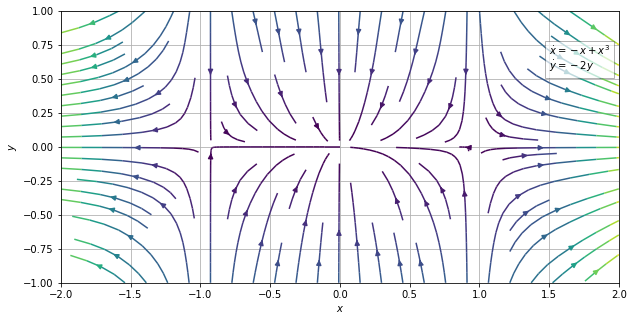

In [4]:
def x_dot(x,y):
    x_ = - x + x**3
    return x_

def y_dot(x, y):
    y_ = -2 * y
    return y_

def speed(x, y):
    s = x_dot(x, y)**2 + y_dot(x, y)**2
    s = np.sqrt(s)
    return s

xmin, xmax, ymin, ymax = -2, 2, -1, 1

x, y = np.linspace(xmin, xmax, 10), np.linspace(ymin, ymax, 10)
x, y = np.meshgrid(x, y)

plt.figure(figsize=(10, 5))

plt.streamplot(x, y, x_dot(x, y), y_dot(x, y), color=speed(x, y), cmap='viridis', density=1)

# plt.title(r'$\dot{x} = - x + x^3$' '\n' r'$\dot{y} = -2y$')
plt.text(xmax*3/4, ymax*3/4,
         r'$\dot{x} = - x + x^3$' '\n' r'$\dot{y} = -2y$', 
         ha='left', va='top',
         bbox=dict(fc=(1, 1, 1, .7), ec=(0, 0, 0, .3)))

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid(True)

# figname = '6_3_1'
# plt.savefig(('img/fig_%s.png' % figname), dpi=None, facecolor='w', edgecolor='w',
#             orientation='portrait', papertype=None, format='png',
#             transparent=False, bbox_inches=None, pad_inches=0.1,
#             frameon=None)

plt.show()

### Example 6.3.2

$$\begin{pmatrix}
\dot{x} \\
\dot{y}
\end{pmatrix} = 
\begin{pmatrix}
- y + ax(x^2 + y^2) \\
x + ay(x^2 + y^2)
\end{pmatrix}$$

*Solution*:

$(x^*, y^*) = (0, 0)$

linearized system

$\dot{x} = -y, \dot{y} = x$

Jacobian 

$$A = \begin{pmatrix}
0 & -1 \\
1 & 0
\end{pmatrix}$$

$\tau = 0, \Delta = 1 > 0$
center

To analyze nonlinear system 

let $x := r\cos\theta, y = r\sin\theta$

$x\dot{x} + y\dot{y} = r\dot{r}$

substituting for $\dot{x}$ and $\dot{y}$ yields

$$\begin{align*}
r\dot{r} 
&= x(-y + ax (x^2 + y^2)) + y(x + ay(x^2 + y^2)) \\
&= a(x^2 + y^2)^2 \\
&= ar^4
\end{align*}$$

$\dot{r} = ar^3$

$$\dot{\theta} = \frac{x\dot{y} - y\dot{x}}{r^2}$$

$$\begin{align*}
\dot{r} &= ar^3 \\
\dot{\theta} &= 1
\end{align*}$$

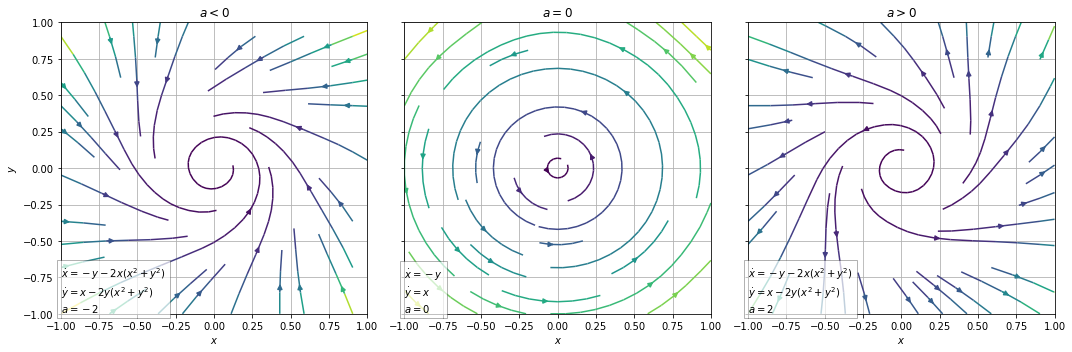

In [5]:
# constant
aa = np.array([-2, 0, 2])

def x_dot(x,y):
    x_ = - y + a*x*(x**2 + y**2)
    return x_

def y_dot(x, y):
    y_ = x + a*y*(x**2 + y**2)
    return y_

def speed(x, y):
    s = x_dot(x, y)**2 + y_dot(x, y)**2
    s = np.sqrt(s)
    return s

xmin, xmax, ymin, ymax = -1, 1, -1, 1

x, y = np.linspace(xmin, xmax, 10), np.linspace(xmin, xmax, 10)
x, y = np.meshgrid(x, y)

titles = np.array([r'$a < 0$', r'$a = 0$', r'$a > 0$'])

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(15, 5))

# plt.figure()

for ax, a in zip(axes, aa):
    ax.streamplot(x, y, x_dot(x, y), y_dot(x, y), color=speed(x, y), cmap='viridis', density=.5)
    
    if a < 0:
        ax.set_title(('%s' % titles[0]))
        ax.text(xmin, ymin,
                (r'$\dot{x} =- y - %d x (x^2 + y^2)$' '\n' r'$\dot{y} = x - %d y (x^2 + y^2)$' '\n' r'$a = %d$' % (np.abs(a), np.abs(a), a)),
                ha='left', va='bottom',
                bbox=dict(fc=(1, 1, 1, .7), ec=(0, 0, 0, .3)))
    elif a == 0:
        ax.set_title(('%s' % titles[1]))
        ax.text(xmin, ymin,
                (r'$\dot{x} =- y$' '\n' r'$\dot{y} = x$' '\n' r'$a = %d$' % a),
                ha='left', va='bottom',
                bbox=dict(fc=(1, 1, 1, .7), ec=(0, 0, 0, .3)))
    elif a > 0:
        ax.set_title(('%s' % titles[2]))
        ax.text(xmin, ymin,
                (r'$\dot{x} =- y - %d x (x^2 + y^2)$' '\n' r'$\dot{y} = x - %d y (x^2 + y^2)$' '\n' r'$a = %d$' % (np.abs(a), np.abs(a), a)),
                ha='left', va='bottom',
                bbox=dict(fc=(1, 1, 1, .7), ec=(0, 0, 0, .3)))
    
    ax.set_xlabel(r'$x$')
    
    ax.grid(True)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

axes[0].set_ylabel(r'$y$')
plt.tight_layout()

# figname = '6_3_2'
# plt.savefig(('img/fig_%s.png' % figname), dpi=None, facecolor='w', edgecolor='w',
#             orientation='portrait', papertype=None, format='png',
#             transparent=False, bbox_inches=None, pad_inches=0.1,
#             frameon=None)

plt.show()

**Robust cases**
- *Repellers* (*sources*): 
    - both eigenval have positive real part
- *Attractors* (*sinks*): 
    - both eigenval have negative real part
- *Saddles*:
    - 1 eigenval is positive; 1 negative

**Marginal cases**
- *Centers*:
    - both eigenval pure imaginary
- *Higher-order & non-isolated fixed points*: 
    - at least 1 eigenval is 0
    
$\Re(\lambda) = 0$

### Hyperbolic Fixed Points, Topological Equivalence, and Structural Stability

If $\Re(\lambda) \ne 0$ for both eigenvalues, 


**hyperbolic**

**topologically equivalent**

**homeomorphism**

**structurally stable**

## 6.4 Rabbits versus Sheep
---

**Lotka-Volterra model of competition**
- 2 species are competing for the same food supply
- amount is limited

1. carrying capacity: logistic growth
2. when encounter, sheep nudges rabbit, nibbling 

$$\begin{align*}
\dot{x} &= x(3 - x - 2y) \\
\dot{y} &= y(2 - x - y)
\end{align*}$$

- $x(t)$: population of rabbits
- $x(t)$: population of sheep

fixed points $\dot{x}=0$, $\dot{y}=0$

$(0, 0)$, $(0, 2)$, $(3, 0)$, $(1, 1)$

Jacobian: 
$$A = \begin{pmatrix}
\frac{\partial\dot{x}}{\partial x} & \frac{\partial\dot{x}}{\partial y} \\
\frac{\partial\dot{y}}{\partial x} & \frac{\partial\dot{y}}{\partial y}
\end{pmatrix} = \begin{pmatrix}
3 - 2x - 2y & -2x \\
-y & 2 - x - 2y
\end{pmatrix}$$

$$
(0, 0):  
A = \begin{pmatrix}
3 & 0 \\
0 & 2
\end{pmatrix}
$$

$\lambda = 3, 2$, unstable node


$$
(0, 2):  
A = \begin{pmatrix}
-1 & 0 \\
-2 & -2
\end{pmatrix}
$$

$\lambda = -1, -2$, stable node

$$
(3, 0):  
A = \begin{pmatrix}
-3 & -6 \\
0 & -1
\end{pmatrix}
$$

$\lambda = -3, -1$, stable node

$$
(1, 1):  
A = \begin{pmatrix}
-1 & -2 \\
-1 & -1
\end{pmatrix}
$$

$\lambda = -1 \pm \sqrt{2}$, saddle point

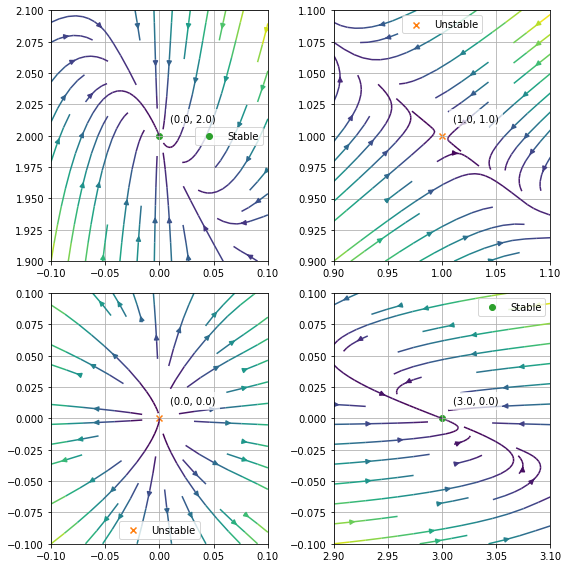

In [14]:
def x_dot(x, y):
    x_ = x * (3 - x - 2*y)
    return x_

def y_dot(x, y):
    y_ = y * (2 - x - y)
    return y_

def speed(x, y):
    s = x_dot(x, y)**2 + y_dot(x, y)**2
    s = np.sqrt(s)
    return s

# xmin, xmax, ymin, ymax = 0, 3.5, 0, 2.5

fixed = np.array([[0, 2], [1, 1], [0, 0], [3, 0]])
stable = np.array(['s', 'u', 'u', 's'])
As = np.array([[-1, 0, -2, -2], 
               [-1, -2, -1, -1], 
               [3, 0, 0, 2], 
               [-3, -6, 0, -1]])


def x_dot_j(x, y, A):
    x_ = A[0]*x + A[1]*y
    return x_

def y_dot_j(x, y, A):
    y_ = A[2]*x + A[3]*y
    return y_

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

for ax, f, s, A in zip(axes.ravel(), fixed, stable, As):

    x, y = np.linspace(f[0]-.1, f[0]+.1, 10), np.linspace(f[1]-.1, f[1]+.1, 10)
    x, y = np.meshgrid(x, y)
    
    ax.streamplot(x, y, x_dot(x, y), y_dot(x, y), 
                  color=speed(x, y), cmap='viridis', 
                  #start_points=[[0, 0], [0, 2], [3, 0], [1, 1]])
                  density=.5)
    
#     ax.streamplot(x, y, x_dot_j(x, y, A), y_dot_j(x, y, A), 
#                   color=speed(x, y), cmap='viridis', 
#                   #start_points=[[0, 0], [0, 2], [3, 0], [1, 1]])
#                   density=.5)
    
    ax.text(f[0]+.01, f[1]+.01, ('(%.1f, %.1f)' % (f[0], f[1])), ha='left', va='bottom', bbox=dict(fc=(1, 1, 1, .7), ec='none'))
    
    if s == 's':
        ax.scatter(f[0], f[1], c=c[2], marker=m[0], label='Stable')
        
    elif s == 'u':
        ax.scatter(f[0], f[1], c=c[1], marker=m[1], label='Unstable')
    
    ax.grid(True)
    ax.set_xlim(f[0]-.1, f[0]+.1)
    ax.set_ylim(f[1]-.1, f[1]+.1)
    ax.legend(loc='best')



# plt.text(3, 2, r'$\dot{x} = x(3 - x - 2y)$' '\n' r'$\dot{y} = y(2 - x - y)$', 
#          ha='left', va='bottom', 
#          bbox=dict(fc=(1, 1, 1, .7), ec=(0, 0, 0, .3)))


# plt.set_title('Lotka-Volterra model of competition')
# plt.set_xlabel('Rabbits')
# plt.set_ylabel('Sheep')

plt.tight_layout()

figname = '6_4_5'
plt.savefig(('img/fig_%s.png' % figname), dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='png',
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None)

plt.show()

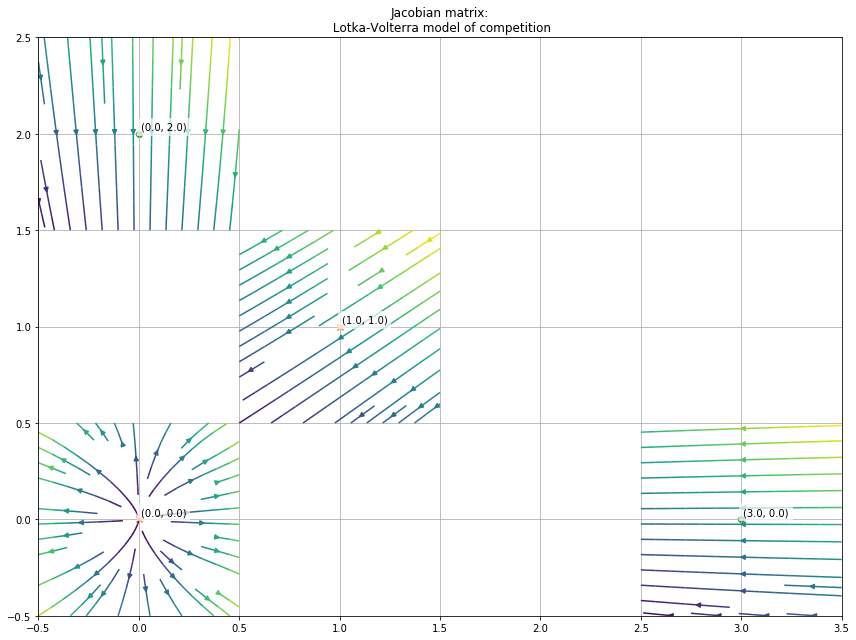

In [21]:
def x_dot(x, y):
    x_ = x * (3 - x - 2*y)
    return x_

def y_dot(x, y):
    y_ = y * (2 - x - y)
    return y_

def speed(x, y):
    s = x_dot(x, y)**2 + y_dot(x, y)**2
    s = np.sqrt(s)
    return s

# xmin, xmax, ymin, ymax = 0, 3.5, 0, 2.5

fixed = np.array([[0, 2], [1, 1], [0, 0], [3, 0]])
stable = np.array(['s', 'u', 'u', 's'])
As = np.array([[-1, 0, -2, -2], 
               [-1, -2, -1, -1], 
               [3, 0, 0, 2], 
               [-3, -6, 0, -1]])


def x_dot_j(x, y, A):
    x_ = A[0]*x + A[1]*y
    return x_

def y_dot_j(x, y, A):
    y_ = A[2]*x + A[3]*y
    return y_

def speed_j(x, y, A):
    s = x_dot_j(x, y, A)**2 + y_dot_j(x, y, A)**2
    s = np.sqrt(s)
    return s

plt.figure(figsize=(12, 9))

for f, s, A in zip(fixed, stable, As):

    x, y = np.linspace(f[0]-.5, f[0]+.5, 10), np.linspace(f[1]-.5, f[1]+.5, 10)
    x, y = np.meshgrid(x, y)
    
    plt.streamplot(x, y, x_dot_j(x, y, A), y_dot_j(x, y, A), 
                  color=speed_j(x, y, A), cmap='viridis', 
                  #start_points=[[0, 0], [0, 2], [3, 0], [1, 1]])
                  density=.5)
    
    plt.text(f[0]+.01, f[1]+.01, ('(%.1f, %.1f)' % (f[0], f[1])), ha='left', va='bottom', bbox=dict(fc=(1, 1, 1, .7), ec='none'))
    
    if s == 's':
        plt.scatter(f[0], f[1], c=c[2], marker=m[0], label='Stable')
        
    elif s == 'u':
        plt.scatter(f[0], f[1], c=c[1], marker=m[1], label='Unstable')
    
    plt.grid(True)
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 2.5)
#     plt.legend(loc='best')



# plt.text(3, 2, r'$\dot{x} = x(3 - x - 2y)$' '\n' r'$\dot{y} = y(2 - x - y)$', 
#          horizontalalignment='left', verticalalignment='bottom', 
#          bbox=dict(fc=(1, 1, 1, .7), ec=(0, 0, 0, .3)))


plt.title('Jacobian matrix:\n Lotka-Volterra model of competition')
# plt.set_xlabel('Rabbits')
# plt.set_ylabel('Sheep')

plt.tight_layout()

# figname = '6_4_5'
# plt.savefig(('img/fig_%s.png' % figname), dpi=None, facecolor='w', edgecolor='w',
#             orientation='portrait', papertype=None, format='png',
#             transparent=False, bbox_inches=None, pad_inches=0.1,
#             frameon=None)

plt.show()

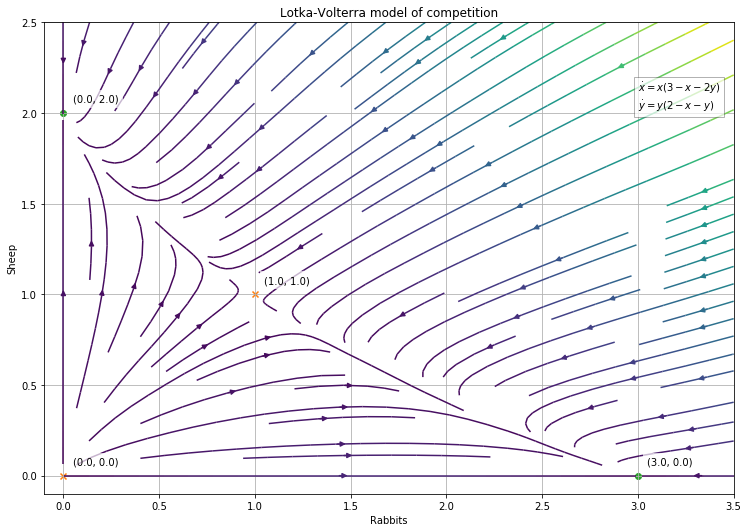

In [3]:
def x_dot(x, y):
    x_ = x * (3 - x - 2*y)
    return x_

def y_dot(x, y):
    y_ = y * (2 - x - y)
    return y_

def speed(x, y):
    s = x_dot(x, y)**2 + y_dot(x, y)**2
    s = np.sqrt(s)
    return s

xmin, xmax, ymin, ymax = 0, 3.5, 0, 2.5

x, y = np.linspace(xmin, xmax, 10), np.linspace(ymin, ymax, 10)
x, y = np.meshgrid(x, y)

fixed = np.array([[0, 0], [0, 2], [3, 0], [1, 1]])
stable = np.array(['u', 's', 's', 'u'])

plt.figure(figsize=(7*1.5, 5*1.5))

plt.streamplot(x, y, x_dot(x, y), y_dot(x, y), 
               color=speed(x, y), cmap='viridis', 
               #start_points=[[0, 0], [0, 2], [3, 0], [1, 1]])
               density=1)
# plt.colorbar()

for f, s in zip(fixed, stable):
    plt.text(f[0]+.05, f[1]+.05, ('(%.1f, %.1f)' % (f[0], f[1])), ha='left', va='bottom', bbox=dict(fc=(1, 1, 1, .7), ec='none'))
    if s == 's':
        plt.scatter(f[0], f[1], c=c[2], marker=m[0])
        
    elif s == 'u':
        plt.scatter(f[0], f[1], c=c[1], marker=m[1])


plt.text(3, 2, r'$\dot{x} = x(3 - x - 2y)$' '\n' r'$\dot{y} = y(2 - x - y)$', 
         ha='left', va='bottom', 
         bbox=dict(fc=(1, 1, 1, .7), ec=(0, 0, 0, .3)))

plt.xlim(xmin-.1, xmax)
plt.ylim(ymin-.1, ymax)
plt.grid(True)

plt.title('Lotka-Volterra model of competition')
plt.xlabel('Rabbits')
plt.ylabel('Sheep')

plt.tight_layout()

figname = '6_4_7'
plt.savefig(('img/fig_%s.png' % figname), dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='png',
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None)

plt.show()

*principle of competitive exculusion*

- [Pianka, E. R. (1981). Competition and niche theory. Ariel, 128, 205-172.](https://www.researchgate.net/publication/257935862_Competition_and_Niche_Theory)
- [Pielou, E. C. (1969). An introduction to mathematical ecology. An introduction to mathematical ecology.](https://www.cabdirect.org/?target=%2fcabdirect%2fabstract%2f19729701428)
- [Edelstein-Keshet, L. (1988). Mathematical models in biology (Vol. 46). Siam.](https://books.google.co.jp/books?hl=en&lr=&id=uABYP1hnsf0C&oi=fnd&pg=PR3&dq=edelstein+keshet+1988&ots=6w4d94lk-m&sig=qCNDITdQw4TfkYxxejiNaIZm3kc#v=onepage&q=edelstein%20keshet%201988&f=false)
- [Murray 2002](https://scholar.google.co.jp/scholar?hl=en&num=20&as_sdt=0%2C5&q=murray+2002&btnG=)

**bsin of attraction**

**basin boundary**

## 6.5 Conservative Systems
---

$$m \ddot{x} = F(x)$$

**potential energy**
$F(x) = - \frac{dV}{dx}$

$$\begin{align*}
m\ddot{x} + \frac{dV}{dx} = 0
& \quad\quad (6.5.1)
\end{align*}$$

multiply by $\dot{x}$

$$\begin{align*}
m\dot{x}\ddot{x} + \frac{dV}{dx}\dot{x} &= 0 \\
\Downarrow \\
\frac{d}{dt} [\frac{1}{2}mx^2 + V(x)] &= 0
\end{align*}$$

where $\frac{d}{dt} V(x(t)) = \frac{dV}{dx}\frac{dx}{dt}$

total energy
$$E = \frac{1}{2}m\dot{x}^2 + V(x)$$

conservative systems

$\mathbf{\dot{x}} = \mathbf{f}(\mathbf{x})$


### Example 6.5.1

show the conservative system cannot have any an attracting fixed points

*Solution*:

suppose: $x^*$ attracting fixed point



### Example 6.5.2

Consider $m=1$, $V(x) = -\frac{1}{2}x^2 + \frac{1}{4}x^4$

*Solultion*:

$-\frac{dV}{dx} = x- x^3$

$\ddot{x} = x - x^3$

rewritten

$$\begin{align*}
\dot{x} &= y \\
\dot{y} &= x - x^3
\end{align*}$$

$y$: velocity

equilibrium points $(\dot{x}, \dot{y}) = (0, 0)$

$(x^*, y^*) = (0, 0), (\pm 1, 0)$

Jacobian: 

$$A = \begin{pmatrix}
0 & 1 \\
1 - 3x^2 & 0
\end{pmatrix}$$

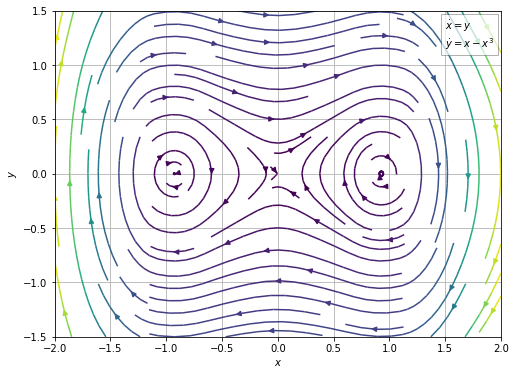

In [37]:
def x_dot(x, y):
    x_ = y
    return x_

def y_dot(x, y):
    y_ = x - x**3
    return y_

def speed(x, y):
    s = x_dot(x, y)**2 + y_dot(x, y)**2
    s = np.sqrt(s)
    return s


xmin, xmax, ymin, ymax = -2, 2, -1.5, 1.5

x, y = np.linspace(xmin, xmax, 10), np.linspace(ymin, ymax, 10)
x, y = np.meshgrid(x, y)

plt.figure(figsize=(8, 6))

plt.streamplot(x, y, x_dot(x, y), y_dot(x, y), 
               color=speed(x, y), cmap='viridis')

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid(True)

plt.text(xmax*3/4, ymax*3/4, (r'$\dot{x} = y$' '\n' r'$\dot{y} = x - x^3$'), 
         ha='left', va='bottom', 
         bbox=dict(fc=(1, 1, 1, .7), ec=(0, 0, 0, .3)))

figname = '6_5_1'
plt.savefig(('img/fig_%s.png' % figname), dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='png',
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None)

plt.show()

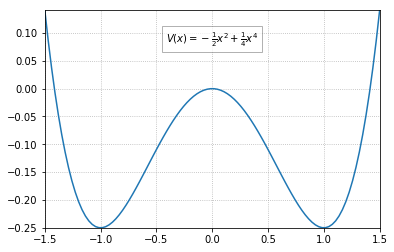

In [6]:
def V(x):
    v = - 1/2 * x**2 + 1/4 * x**4
    return v

xmin, xmax = -1.5, 1.5
ymin, ymax = -0.25, V(xmax)
x = np.linspace(xmin, xmax, 100)

plt.plot(x, V(x))

plt.text(xmin/2+xmax/2, ymax*3/4, (r'$V(x) = -\frac{1}{2}x^2 + \frac{1}{4}x^4$'), 
         ha='center', va='top', 
         bbox=dict(fc=(1, 1, 1, .7), ec=(0, 0, 0, .3)))

plt.grid(linestyle=l[3])
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.show()

### Example 6.5.3

Sketch the graph of the energy fn $E(x, y)$

*Solution*:

**energy surface**



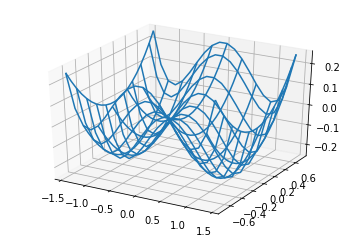

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def V(x):
    v = - 1/2 * x**2 + 1/4 * x**4
    return v

def E(x, y):
    e = 1/2*y**2 + V(x)
    return e

xmin, xmax = -np.sqrt(2), np.sqrt(2)
ymin, ymax = -np.sqrt(2)/2, np.sqrt(2)/2

x, y = np.linspace(xmin, xmax, 20), np.linspace(ymin, ymax, 20)
x, y = np.meshgrid(x, y)
e = E(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(x, y, e, rstride=2, cstride=2)
# ax.contour(x, y, e)

plt.show()

### Nonlinear Centers

**Theorem 6.5.1:** 
Nonlinear centers for conservative systems

system $\mathbf{\dot{x}} = \mathbf{f}(\mathbf{x})$

where $\mathbf{x} = (x, y) \in \mathbf{R}^2$, $\mathbf{f}$ is continuously differentiable

sonserved quantity $E(x)$, $\mathbf{x}^*$ is isolated fixed point 

if $\mathbf{x}^*$ is a local min of $E$, all trajectories sufficiently close to $\mathbf{x}^*$ are closed


**Ideas behind the proof:**

1. the theorem is valid for local max of *E*
2. assume that $\mathbf{x}^*$


## 6.6 Reversible Systems
---

**time-reversal symmetry**

e.g., undamped pendulum

$m\ddot{x} = F(x)$

$t \rightarrow -t$, $\ddot{x}$ stays the same

$$\begin{align*}
\dot{x} &= y \\
\dot{y} &= \frac{1}{m} F(x)
\end{align*}$$

- $y$: velocity
- 

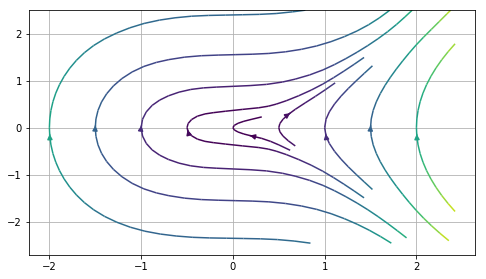

In [55]:
# constant
m = 1

def F(x):
    return x**2

def x_dot(x, y):
    return y

def y_dot(x, y):
    return 1/m * F(x)

def speed(x, y):
    return np.sqrt(x_dot(x, y)**2 + y_dot(x, y)**2)

x, y = np.linspace(-2.5, 2.5, 10), np.linspace(-2.5, 2.5, 10)
x, y = np.meshgrid(x, y)

x_sp = np.arange(-2, 2.1, .5)
y_sp = np.repeat(0, len(x_sp))
sp = np.array([x_sp, y_sp])

# print(sp.T)

fig, axes = plt.subplots(figsize=(8, 4.5))

axes.streamplot(x, y, x_dot(x, y), y_dot(x, y), 
                color=speed(x, y), cmap='viridis', 
                #density=.5, 
                start_points=sp.T)

# axes.set_xlim()
axes.grid(True)

plt.show()

$$\begin{align*}
\dot{x} &= f(x, y) \\
\dot{y} &= g(x, y)
\end{align*}$$

where $f$: odd, $g$: even

**Theorem 6.6.1**:
(Nonlinear centers for reversible systems)

**Ideas behind the proof**:



### Example 6.6.1

$$\begin{align*}
\dot{x} &= y - y^3 \\
\dot{y} &= - x - y^2
\end{align*}$$


*Solution*:

$$A = \begin{pmatrix}
0 & 1 \\
-1 & 0
\end{pmatrix}$$

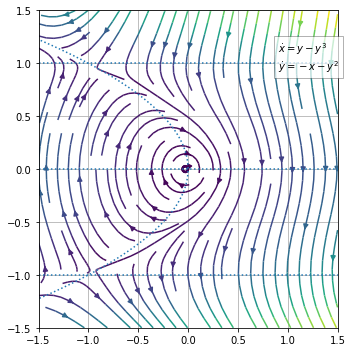

In [6]:
def x_dot(x, y):
    return y - y**3

def y_dot(x, y):
    return - x - y**2

def speed(x, y):
    return np.sqrt(x_dot(x, y)**2 + y_dot(x, y)**2)



# def Jacobian():
xmin, xmax = -1.5, 1.5
ymin, ymax = -1.5, 1.5


fig, axes = plt.subplots(figsize=(5, 5))

y = np.linspace(ymin, ymax, 100)
axes.plot(-y**2, y, linestyle=l[3])

x, y = np.linspace(xmin, xmax, 10), np.linspace(ymin, ymax, 10)
x, y = np.meshgrid(x, y)

axes.axhline(-1, linestyle=l[3])
axes.axhline(0, linestyle=l[3])
axes.axhline(1, linestyle=l[3])


axes.streamplot(x, y, x_dot(x, y), y_dot(x, y), 
                density=1, 
                color=speed(x, y), cmap='viridis')

# axes.scatter(0, 0, marker=m[0], c=c[2])
# axes.scatter(0, 0, marker=m[0], c=c[2])

axes.text(xmin+(xmax-xmin)*4/5, ymin+(ymax-ymin)*4/5, (r'$\dot{x} = y - y^3$' '\n' r'$\dot{y} = - x - y^2$'), 
          ha='left', va='bottom', 
          bbox=dict(fc=(1, 1, 1, .7), ec=(0, 0, 0, .3)))

axes.set_xlim(xmin, xmax)
axes.grid(True)
plt.tight_layout()

figname = '6_6_4'
plt.savefig(('img/fig_%s.png' % figname), dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='png',
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None)

plt.show()

**heteroclinic trajectories** / **saddle connections**

### Example 6.6.2

$$\begin{align*}
\dot{x} &= y \\
\dot{y} &= x - x^2
\end{align*}$$

has homoclinic orbit $x ≥ 0$

*Solution*:



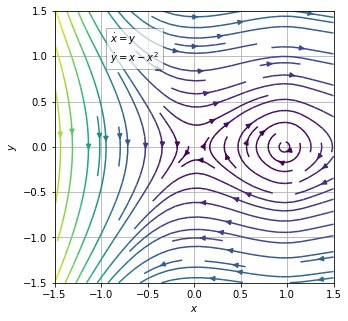

In [18]:
def x_dot(x, y):
    return y

def y_dot(x, y):
    return x - x**2

def speed(x, y):
    return np.sqrt(x_dot(x, y)**2 + y_dot(x, y)**2)



# def Jacobian():
xmin, xmax, ymin, ymax = -1.5, 1.5, -1.5, 1.5

x, y = np.linspace(xmin, xmax, 10), np.linspace(ymin, ymax, 10)
x, y = np.meshgrid(x, y)

fig, axes = plt.subplots(figsize=(5, 5))

axes.streamplot(x, y, x_dot(x, y), y_dot(x, y), color=speed(x, y), cmap='viridis')

axes.text(xmin+(xmax-xmin)/5, ymin+(ymax-ymin)*4/5, 
          (r'$\dot{x} = y$' '\n' r'$\dot{y} = x - x^2$'), 
          ha='left', va='bottom', 
          bbox=dict(fc=(1, 1, 1, .7), ec=(0, 0, 0, .3)))

axes.set_xlim(xmin, xmax)
axes.set_ylim(ymin, ymax)
axes.set_xlabel(r'$x$')
axes.set_ylabel(r'$y$')
axes.grid(True)

figname = '6_6_6'
plt.savefig(('img/fig_%s.png' % figname), dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='png',
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None)

plt.show()

### Example 6.6.3

$$\begin{align*}
\dot{x} &= -2\cos x - \cos y \\
\dot{y} &= -2\cos y - \cos x
\end{align*}$$

*Solution*:

fixed point

$2\cos x = - \cos y$, $2\cos y = - \cos x$

$\cos x^* = \cos y^* = 0$

$(x^*, y^*) = (\pm \frac{\pi}{2}, \pm \frac{\pi}{2})$

Jacobian 

$$A = \begin{pmatrix}
2\sin x^* & \sin y^* \\
\sin x^* & 2\sin y^*
\end{pmatrix} = 
\begin{pmatrix}
-2 & -1 \\
-1 & -2
\end{pmatrix}$$

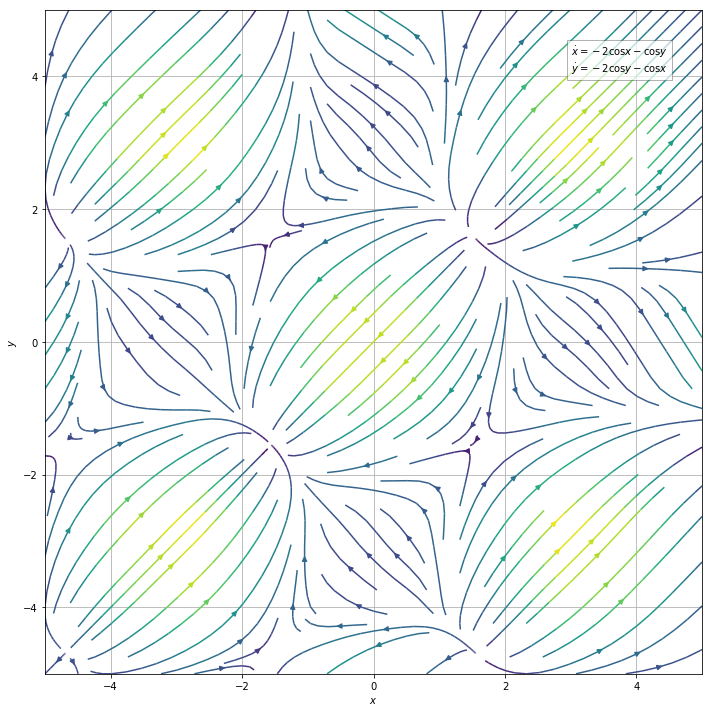

In [48]:
def x_dot(x, y):
    return -2*np.cos(x) - np.cos(y)

def y_dot(x, y):
    return -2*np.cos(y) - np.cos(x)

def speed(x, y):
    return np.sqrt(x_dot(x, y)**2 + y_dot(x, y)**2)



# def Jacobian():
xmin, xmax, ymin, ymax = -5, 5, -5, 5

x, y = np.linspace(xmin, xmax, 10), np.linspace(ymin, ymax, 10)
x, y = np.meshgrid(x, y)

fig, axes = plt.subplots(figsize=(10, 10))

axes.streamplot(x, y, x_dot(x, y), y_dot(x, y), 
                color=speed(x, y), cmap='viridis', 
                density=1.5)


axes.text(xmin+(xmax-xmin)*4/5, ymin+(ymax-ymin)*9/10, 
          (r'$\dot{x} = -2\cos x - \cos y$' '\n' r'$\dot{y} = -2 \cos y - \cos x$'), 
          ha='left', va='bottom', 
          bbox=dict(fc=(1, 1, 1, .7), ec=(0, 0, 0, .3)))

axes.set_xlim(xmin, xmax)
axes.set_ylim(ymin, ymax)
axes.set_xlabel(r'$x$')
axes.set_ylabel(r'$y$')
axes.grid(True)

plt.tight_layout()

figname = '6_6_7'
plt.savefig(('img/fig_%s.png' % figname), dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='png',
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None)

plt.show()

- [Tsang 1991]()
- [Politi 1986]()
- [Stone, Nadim, Strogatz 1991]()

## 6.7 Pendulum
---

$$\begin{align*}
\frac{d^2\theta}{dt^2} + \frac{g}{L} \sin\theta = 0
& \quad\quad (6.7.1)
\end{align*}$$


nondimensionalize 

$\omega := \sqrt{\frac{g}{L}}$, 
$\tau := \omega t$

$$\begin{align*}
\ddot{\theta} + \sin\theta = 0
& \quad\quad (6.7.2)
\end{align*}$$

$$\begin{align*}
\dot{\theta} &= v
& \quad\quad (6.7.3a) \\
\dot{v} &= -\sin\theta
& \quad\quad (6.7.3b)
\end{align*}$$

- $v$: dimensionless angular velocity

$(\theta^*, v^*) = (k\pi, 0)$

Jacobian

$$A = \begin{pmatrix}
0 & 1 \\
-1 & 0
\end{pmatrix}$$

origin: linear center

(6.7.2) $\times \dot{\theta}$

$$\begin{align*}
\dot{\theta}(\ddot{\theta} + \sin\theta) &= 0 \\
\Rightarrow \frac{1}{2}\dot{\theta}^2 - \cos\theta &= \text{constant}
\end{align*}$$

energy fn:

$$\begin{align*}
E(\theta, v) = \frac{1}{2} v^2 - \cos\theta
& \quad\quad (6.7.4)
\end{align*}$$

$E \approx \frac{1}{2}(v^2 + \theta^2) - 1$

for small $(\theta, v)$

$\theta^2 + v^2 \approx 2(E + 1)$

Jacobian:
$A = \begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}$

$$\begin{align*}
& \quad\quad (6..)
\end{align*}$$

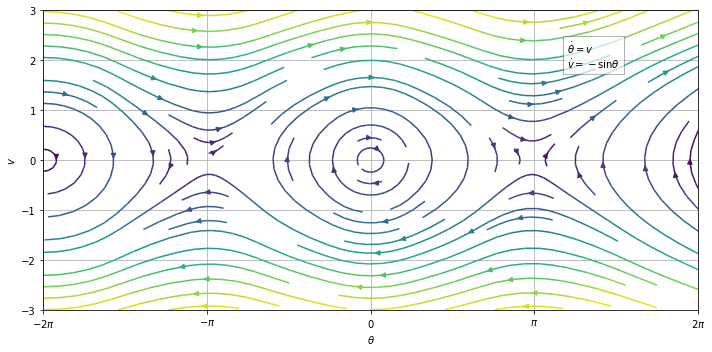

In [13]:
pi = np.pi

def theta_dot(theta, v):
    return v

def v_dot(theta, v):
    return -np.sin(theta)

def speed(x, y):
    return np.sqrt(theta_dot(x, y)**2 + v_dot(x, y)**2)



# def Jacobian():
thetamin, thetamax, vmin, vmax = -pi*2, pi*2, -3, 3

theta, v = np.linspace(thetamin, thetamax, 10), np.linspace(vmin, vmax, 10)
theta, v = np.meshgrid(theta, v)

fig, axes = plt.subplots(figsize=(10, 5))

axes.streamplot(theta, v, theta_dot(theta, v), v_dot(theta, v), 
                color=speed(theta, v), cmap='viridis', 
                density=1)


axes.text(thetamin+(thetamax-thetamin)*4/5, vmin+(vmax-vmin)*4/5, 
          (r'$\dot{\theta} = v$' '\n' r'$\dot{v} = -\sin\theta$'), 
          ha='left', va='bottom', 
          bbox=dict(fc=(1, 1, 1, .7), ec=(0, 0, 0, .3)))

axes.set_xlim(thetamin, thetamax)
axes.set_ylim(vmin, vmax)
axes.set_xticks(np.arange(thetamin, thetamax+1, pi))
axes.set_xticklabels([r'$-2\pi$', r'$-\pi$', r'$0$', r'$\pi$', r'$2\pi$'])
axes.set_xlabel(r'$\theta$')
axes.set_ylabel(r'$v$')
axes.grid(True)

plt.tight_layout()

figname = '6_7_3'
plt.savefig(('img/fig_%s.png' % figname), dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='png',
            transparent=False, bbox_inches=None, pad_inches=0.1,
            frameon=None)

plt.show()

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]
/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


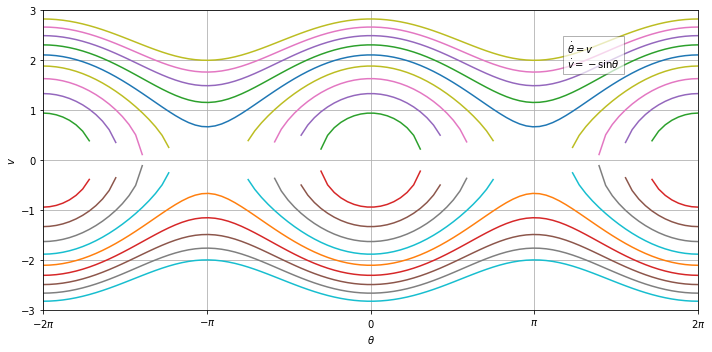

In [35]:
pi = np.pi

def theta_dot(theta, v):
    return v

def v_dot(theta, v):
    return -np.sin(theta)

def speed(x, y):
    return np.sqrt(theta_dot(x, y)**2 + v_dot(x, y)**2)

def v_pos(theta, E):
    return np.sqrt(E*2 + np.cos(theta)*2)

def v_neg(theta, E):
    return - np.sqrt(E*2 + np.cos(theta)*2)

# def Jacobian():
thetamin, thetamax, vmin, vmax = -pi*2, pi*2, -3, 3

theta, v = np.linspace(thetamin, thetamax, 10), np.linspace(vmin, vmax, 10)
theta, v = np.meshgrid(theta, v)

fig, axes = plt.subplots(figsize=(10, 5))

# axes.streamplot(theta, v, theta_dot(theta, v), v_dot(theta, v), 
#                 color=speed(theta, v), cmap='viridis', 
#                 density=1)

# Es = np.array([-.9, 0, 1, 1.5])
Es = np.linspace(-1, 3, 10)
theta = np.linspace(thetamin, thetamax, 100)

for E in Es:
    axes.plot(theta, v_pos(theta, E))#, label=(r'$E = %.1f$' % E))
    axes.plot(theta, v_neg(theta, E))#, label=(r'$E = %.1f$' % E))


axes.text(thetamin+(thetamax-thetamin)*4/5, vmin+(vmax-vmin)*4/5, 
          (r'$\dot{\theta} = v$' '\n' r'$\dot{v} = -\sin\theta$'), 
          ha='left', va='bottom', 
          bbox=dict(fc=(1, 1, 1, .7), ec=(0, 0, 0, .3)))

axes.set_xlim(thetamin, thetamax)
axes.set_ylim(vmin, vmax)
axes.set_xticks(np.arange(thetamin, thetamax+1, pi))
axes.set_xticklabels([r'$-2\pi$', r'$-\pi$', r'$0$', r'$\pi$', r'$2\pi$'])
axes.set_xlabel(r'$\theta$')
axes.set_ylabel(r'$v$')
axes.grid(True)
# axes.legend(loc='lower right')

plt.tight_layout()

# figname = '6_7_3_1'
# plt.savefig(('img/fig_%s.png' % figname), dpi=None, facecolor='w', edgecolor='w',
#             orientation='portrait', papertype=None, format='png',
#             transparent=False, bbox_inches=None, pad_inches=0.1,
#             frameon=None)

plt.show()

**librations**
- small orbits surrounding teh oscillations

**rotations**

### Cyndrical Phase Space

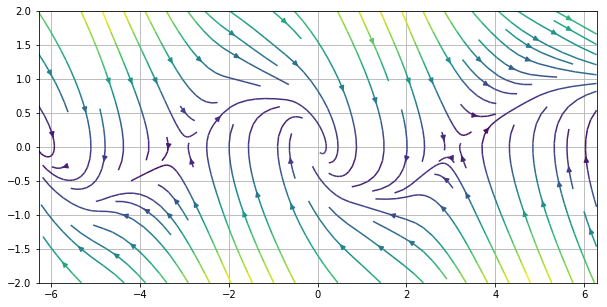

In [38]:
pi = np.pi
b = 1

def theta_dot(theta, v):
    return v

def v_dot(theta, v):
    return -b*v -np.sin(theta)

def speed(x, y):
    return np.sqrt(theta_dot(x, y)**2 + v_dot(x, y)**2)

thetamin, thetamax, vmin, vmax = -pi*2, pi*2, -2, 2

theta, v = np.linspace(thetamin, thetamax, 10), np.linspace(vmin, vmax, 10)
theta, v = np.meshgrid(theta, v)

fig, axes = plt.subplots(figsize=(10, 5))

axes.streamplot(theta, v, theta_dot(theta, v), v_dot(theta, v), 
                color=speed(theta, v), cmap='viridis', 
                density=1)

axes.set_xlim(thetamin, thetamax)
axes.set_ylim(vmin, vmax)



axes.grid(True)

plt.show()

---

*Overview*

- [6.0 Introduction](#6.0-Introduction)
- [6.1 Phase Portraits](#6.1-Phase-Portraits)
     - [Numerical Computaion of Phase Portraits](#Numerical-Computaion-of-Phase-Portraits)
     - [Example 6.1.1](#Example-6.1.1)
- [6.2 Exsitence, Uniquness, and Topological Consequences](#6.2-Exsitence,-Uniquness,-and-Topological-Consequences)
    - [Existence and Uniquness Theorem](#Existence-and-Uniquness-Theorem)
- [6.3 Fixed Points and Linearization](#6.3-Fixed-Points-and-Linearization)
    - [Linearized System](#Linearized-System)
    - [The Effect of Small Nonlinear Terms](#The-Effect-of-Small-Nonlinear-Terms)
    - [Example 6.3.1](#Example-6.3.1)
    - [Example 6.3.2](#Example-6.3.2)
    - [Robust cases](#Robust-cases)
    - [Hyperbolic Fixed Points, Topological Equivalence, and Structural Stability](#Hyperbolic-Fixed-Points,-Topological-Equivalence,-and-Structural-Stability)
- [6.4 Rabbits versus Sheep](#6.4-Rabbits-versus-Sheep)
- [6.5 Conservative Systems](#6.5-Conservative-Systems)
    - [Example 6.5.1](#Example-6.5.1)
    - [Example 6.5.2](#Example-6.5.2)
    - [Example 6.5.3](#Example-6.5.3)
    - [Nonlinear Centers](#Nonlinear-Centers)
- [6.6 Reversible Systems](#6.6-Reversible-Systems)
    - [Example 6.6.1](#Example-6.6.1)
    - [Example 6.6.2](#Example-6.6.2)
    - [Example 6.6.3](#Example-6.6.3)
- [6.7 Pendulum](#6.7-Pendulum)
    - [Cyndrical Phase Space](#Cyndrical-Phase-Space)